# Quadrotor Ball System
by Sebastian Lopez-Cot

This python notebook can be used to run the quad-ball system. The quadrotor will try to send a ball to a desired location given initial conditions and will attempt to return to its original starting point.

Populating the interactive namespace from numpy and matplotlib
Should end at:  [ 0.  0.]
Number of decision vars:  1200
Solve:  SolutionResult.kInfeasibleConstraints


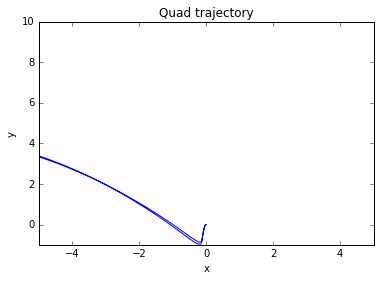

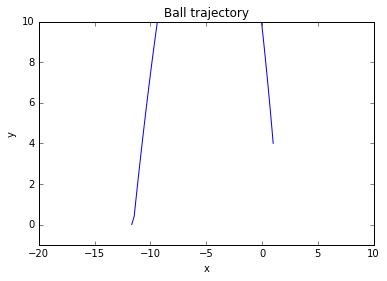

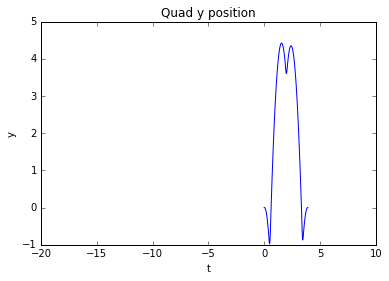

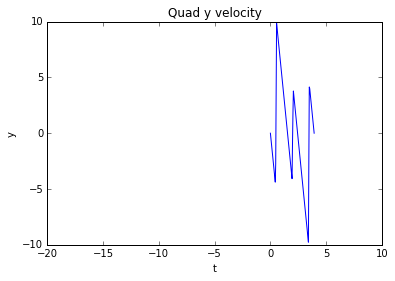

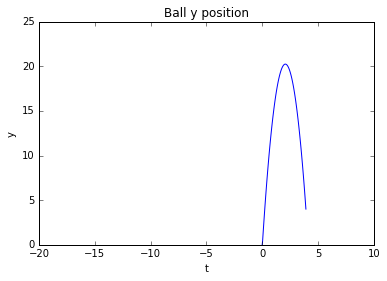

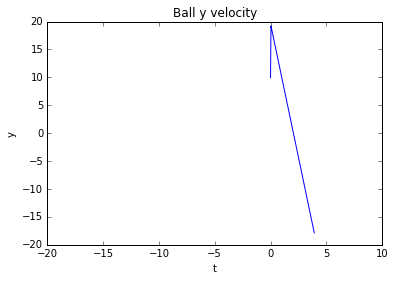

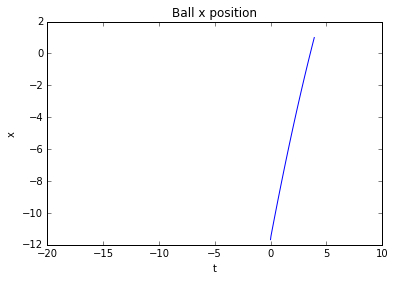

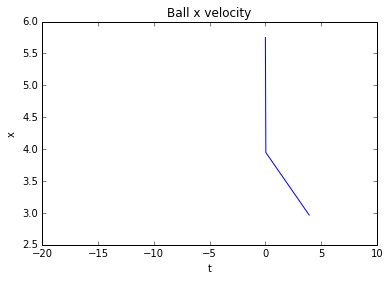

[[ -0.00000000e+00   5.73622108e+00]
 [ -0.00000000e+00   4.89469797e+00]
 [ -0.00000000e+00   4.05318814e+00]
 [ -0.00000000e+00   3.21167585e+00]
 [ -0.00000000e+00   2.37016423e+00]
 [ -0.00000000e+00   1.52865239e+00]
 [ -0.00000000e+00   6.87134405e-01]
 [ -0.00000000e+00  -1.54371946e-01]
 [ -0.00000000e+00  -9.95831392e-01]
 [ -0.00000000e+00  -1.83741163e+00]
 [ -0.00000000e+00  -2.67890670e+00]
 [  5.68050031e+00  -3.44764008e+00]
 [  1.89138053e+01  -3.91247066e+00]
 [  1.89351399e+01  -3.92601830e+00]
 [ -0.00000000e+00  -3.71940624e+00]
 [ -0.00000000e+00  -3.51279606e+00]
 [ -0.00000000e+00  -3.30618381e+00]
 [ -0.00000000e+00  -3.09957020e+00]
 [ -0.00000000e+00  -2.89296100e+00]
 [ -0.00000000e+00  -2.68634503e+00]
 [ -0.00000000e+00  -2.47973385e+00]
 [ -0.00000000e+00  -2.27311763e+00]
 [ -0.00000000e+00  -2.06651156e+00]
 [ -0.00000000e+00  -1.85989577e+00]
 [ -0.00000000e+00  -1.65328407e+00]
 [ -0.00000000e+00  -1.44664928e+00]
 [ -0.00000000e+00  -1.24006513e+00]
 

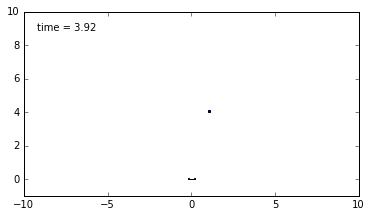

In [22]:
%pylab inline
%reload_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import scipy as sp

from pydrake.all import MathematicalProgram
from pydrake.symbolic import (sin,cos,tanh)

from quad_ball_system import (BallQuadSystem, Quadrotor, Ball, Animator)
from IPython.display import HTML

# Define the min and max time for the problem
time_used = 4.0

# Quad initial conditions
initial_quad_state = np.zeros(6)
initial_quad_state[0] = 0.0
initial_quad_state[1] = 0.0
initial_quad_state[2] = 0.0
initial_quad_state[3] = 0.0
initial_quad_state[4] = 0.0
initial_quad_state[5] = 0.0

final_quad_state = np.zeros(6)
final_quad_state[0] = 0.0 #np.random.choice(np.arange(-4.0, 4.0, 0.1))
final_quad_state[1] = 0.0 #np.random.choice(np.arange(1.0, 2.0, 0.1))
final_quad_state[2] = 0.0
final_quad_state[3] = 0.0
final_quad_state[4] = 0.0
final_quad_state[5] = 0.0

print "Should end at: ", final_quad_state[0:2]

# Ball initial conditions (launched)
vlaunch = 11.5
theta = 60.0 * np.pi / 180.0

initial_ball_state = np.zeros(4)
initial_ball_state[0] = -2.0*(vlaunch)**2 * np.sin(theta) * np.cos(theta) / 9.81
initial_ball_state[1] = 0.0
initial_ball_state[2] = vlaunch * np.cos(theta)
initial_ball_state[3] = vlaunch * np.sin(theta)

#initial_ball_state = np.zeros(4)
#initial_ball_state[0] = 0.0
#initial_ball_state[1] = 6.0
#initial_ball_state[2] = 0.0
#initial_ball_state[3] = 0.0

# Ball final state conditions
final_ball_state = np.copy(initial_ball_state)
final_ball_state[0] = 1.0
final_ball_state[1] = 4.0

# System params
quad_mass = 0.1
g = -9.81
beta = 1.0

# Run the solver
bqs = BallQuadSystem(quad_mass, g, beta)
quad_traj, ball_traj, input_traj, time_array = bqs.solve(initial_quad_state, final_quad_state, initial_ball_state, final_ball_state, time_used)

# Visualize the results
plt.figure()
plt.title("Quad trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,5)
plt.ylim(-1,10)
plt.plot(quad_traj[:,0], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Ball trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-20,10)
plt.ylim(-1,10)
plt.plot(ball_traj[:,0], ball_traj[:,1])
plt.show()

#assert(time_array[0:100].shape == ball_traj[:,1].shape)

plt.figure()
plt.title("Quad y position")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Quad y velocity")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], quad_traj[:,4])
plt.show()

plt.figure()
plt.title("Ball y position")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], ball_traj[:,1])
plt.show()

plt.figure()
plt.title("Ball y velocity")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], ball_traj[:,3])
plt.show()

plt.figure()
plt.title("Ball x position")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("x")
plt.plot(time_array[0:100], ball_traj[:,0])
plt.show()

plt.figure()
plt.title("Ball x velocity")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("x")
plt.plot(time_array[0:100], ball_traj[:,2])
plt.show()

print input_traj

# VISUALIZE
quad = Quadrotor()
ball = Ball()

dt = time_array[1] - time_array[0]
steps = time_array.shape[0] - 1

quad_state = np.reshape(quad_traj[:,0:3], (steps, 3))
ball_state = np.reshape(ball_traj[:,0:2], (steps, 2))

a = Animator(time_array[0:steps], quad_state, ball_state)
a.gen_html_animation()

